In [2]:
import warnings
warnings.simplefilter('ignore')

---

# 00 Initial Analysis 

In [3]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [4]:
target_ts = '2min.parquet'

cwd = os.getcwd()
meta_data = os.path.join(cwd, "..", "data", "raw_data", "metadata.csv")
time_series = os.path.join(cwd, "..", "data", "raw_data", target_ts)

df_energy = pd.read_parquet(time_series)
df_spec = pd.read_csv(meta_data)

gcs_path = 'gs://energy-supply-time-series-data/30min_energy_supply_data.parquet'

df_spec.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [6]:
len(df_energy)

558135324

In [4]:
df_energy.head()

,generation_w,timestamp,ss_id
0,11.0,2016-12-01 07:42:27+00:00,3952
1,29.0,2016-12-01 07:42:35+00:00,6125
2,2.0,2016-12-01 07:42:35+00:00,6867
3,4.0,2016-12-01 07:42:36+00:00,3513
4,5.0,2016-12-01 07:42:36+00:00,5660


In [5]:
df_energy.head()

,generation_w,timestamp,ss_id
0,11.0,2016-12-01 07:42:27+00:00,3952
1,29.0,2016-12-01 07:42:35+00:00,6125
2,2.0,2016-12-01 07:42:35+00:00,6867
3,4.0,2016-12-01 07:42:36+00:00,3513
4,5.0,2016-12-01 07:42:36+00:00,5660


NameError: name 'df_energy_sample' is not defined

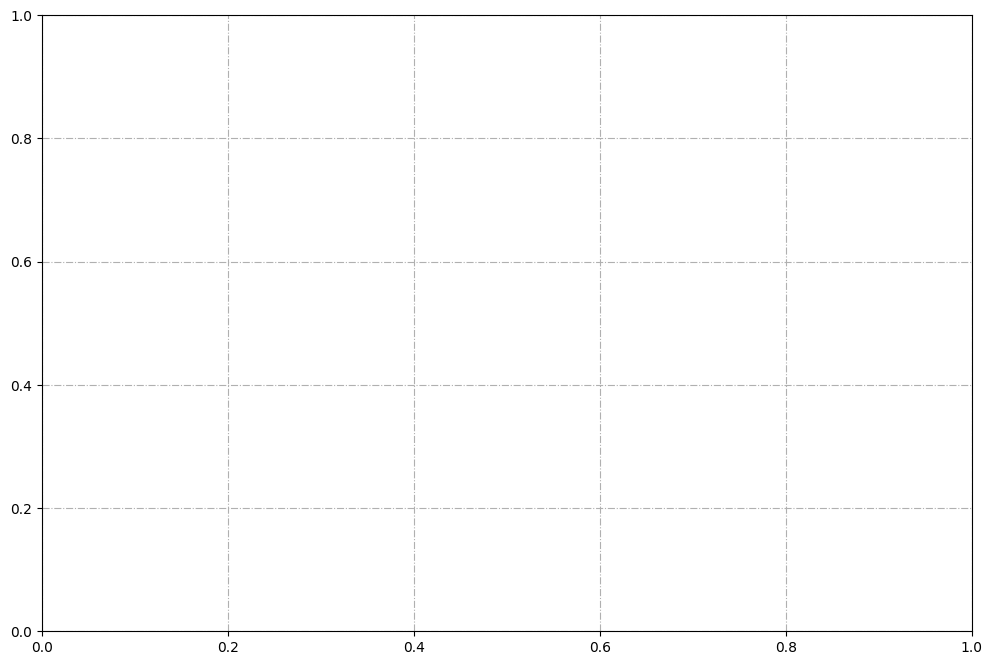

In [6]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df_energy_sample['timestamp'], df_energy_sample['generation_w'], 'b')

In [ ]:
df_spec.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [ ]:
import plotly.express as px

# Define a function to check if a location is in London
def is_in_london(latitude, longitude):
    # Replace the conditions with the actual latitude and longitude boundaries of London
    london_latitude_range = (51.3, 51.7)
    london_longitude_range = (-0.5, 0.3)
    return (london_latitude_range[0] <= latitude <= london_latitude_range[1]) and (london_longitude_range[0] <= longitude <= london_longitude_range[1])

# Create a new column indicating whether each location is in London
df_spec['in_london'] = df_spec.apply(lambda row: is_in_london(row['latitude_rounded'], row['longitude_rounded']), axis=1)

# Create the scatter plot, coloring the circles differently for locations in London
fig = px.scatter_geo(df_spec, lat=df_spec['latitude_rounded'], lon=df_spec['longitude_rounded'],
                     color='in_london',  # Use the 'in_london' column for coloring
                     scope="europe", projection="natural earth")

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))  # Set all margins to zero

fig.show()

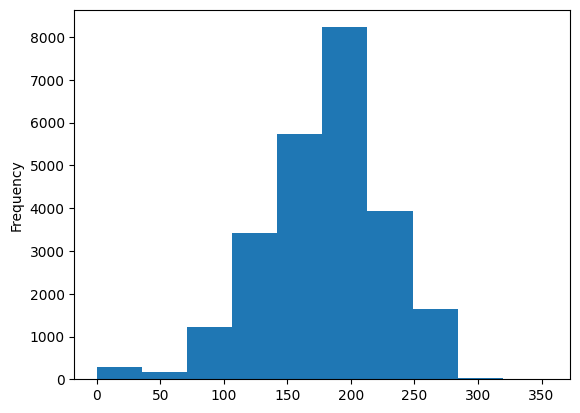

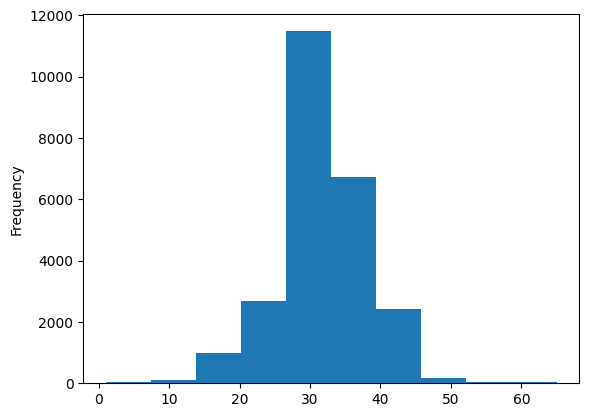

In [ ]:
plt.show(df_spec.orientation.plot(kind='hist'))
plt.show(df_spec.tilt.plot(kind='hist'))

In [12]:
# Test the weather API
import requests
import pandas as pd 

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
	"latitude": 52.52, # from df_spec
	"longitude": 13.41, # from df_spec
	"start_date": "2016-10-25", # from timeseries 
	"end_date": "2016-10-25", # from timeseries
	"timezone": "Europe/London", # default for london
	"hourly": ["weather_code", "shortwave_radiation", "direct_radiation", "diffuse_radiation", "direct_normal_irradiance", "global_tilted_irradiance", "terrestrial_radiation", "shortwave_radiation_instant", "direct_radiation_instant", "diffuse_radiation_instant", "direct_normal_irradiance_instant", "global_tilted_irradiance_instant", "terrestrial_radiation_instant"]       
     }

responses = requests.get(base_url, params).json()

df = pd.DataFrame({
    'time': responses['hourly']['time'],
    # 'weather_code': responses['hourly']['weather_code'],
    # 'shortwave_radiation': responses['hourly']['shortwave_radiation']
    # ... continue with remaining
    })

df.head(5)


,time
0,2016-10-25T00:00
1,2016-10-25T01:00
2,2016-10-25T02:00
3,2016-10-25T03:00
4,2016-10-25T04:00


In [14]:
# looping through hourly params and appending to df
for param in params['hourly']:
    df[param] = responses['hourly'][param]

df.head(10)

,time,weather_code,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant
0,2016-10-25T00:00,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-10-25T01:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-10-25T02:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-10-25T03:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-10-25T04:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-10-25T05:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-10-25T06:00,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8
7,2016-10-25T07:00,53,6.0,0.0,6.0,0.0,6.0,111.9,11.1,0.0,11.1,0.0,8.0,207.3
8,2016-10-25T08:00,51,20.0,0.0,20.0,0.0,20.0,292.4,25.4,0.0,25.4,0.0,25.4,371.8
9,2016-10-25T09:00,3,73.0,1.0,72.0,3.2,73.0,437.1,82.7,1.1,81.5,3.2,82.7,494.9


In [ ]:
# Get definitiion for weather WMO codes
from IPython.display import Image

wmo_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/76b0cb0ef0bfd8a2ec988aa54e30ecd1b483495d/descriptions.json'
wmo_description = requests.get(wmo_url).json()

image = wmo_description['0']['day']['image']
Image(image)
print(wmo_description['0']['day']['description'])

Sunny


In [ ]:
# Define a function to map weather codes to descriptions
def get_weather_description(weather_code):
    return wmo_description[str(weather_code)]['day']['description']

# Apply the function to create a new column with descriptions
df['description'] = df['weather'].apply(get_weather_description)

df

,time,weather,description
0,2016-10-25T00:00,53,Drizzle
1,2016-10-25T01:00,51,Light Drizzle
2,2016-10-25T02:00,51,Light Drizzle
3,2016-10-25T03:00,51,Light Drizzle
4,2016-10-25T04:00,51,Light Drizzle
5,2016-10-25T05:00,51,Light Drizzle
6,2016-10-25T06:00,51,Light Drizzle
7,2016-10-25T07:00,53,Drizzle
8,2016-10-25T08:00,51,Light Drizzle
9,2016-10-25T09:00,3,Cloudy


# 01 Defining Sample set

In [16]:
sample_id = 6125

df_energy_sample = df_energy[df_energy.ss_id == sample_id]
df_energy_sample.head()

,generation_w,timestamp,ss_id
1,29.0,2016-12-01 07:42:35+00:00,6125
14,49.0,2016-12-01 07:46:35+00:00,6125
35,112.0,2016-12-01 07:52:35+00:00,6125
91,146.0,2016-12-01 07:56:35+00:00,6125
215,260.0,2016-12-01 08:02:38+00:00,6125


In [17]:
df_spec_sample = df_spec[df_spec.ss_id == sample_id]
df_spec_sample

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
3720,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11


In [18]:
# merge energy gerneration with spec df
df_merged_sample = pd.merge(df_energy_sample,df_spec_sample,how='left',on='ss_id')

# filter to show only hourly values
df_merged_sample = df_merged_sample[df_merged_sample['timestamp'].dt.minute == 0]

# create date time column that matches API output 
df_merged_sample['formatted_timestamp'] = df_merged_sample['timestamp'].dt.strftime('%Y-%m-%dT%H:%M')
df_merged_sample.head(1)

,generation_w,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,formatted_timestamp
8485,94.0,2016-10-25 07:00:59+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T07:00


# 02 Single Row Test

In [ ]:
# create one row test
import requests
import pandas as pd 

df_merged_single = df_merged_sample.head(1)
base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
        "latitude": df_merged_single['latitude_rounded'],
        "longitude": df_merged_single['longitude_rounded'],
        "start_date": df_merged_single['timestamp'].iloc[0].date(),
        "end_date": df_merged_single['timestamp'].iloc[0].date(),
        "timezone": "Europe/London",
        "hourly": "weather_code"
    }

response = requests.get(base_url, params)
data = response.json()
hourly_weather = data['hourly']['weather_code']
hourly_time = data['hourly']['time']

wmo_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/76b0cb0ef0bfd8a2ec988aa54e30ecd1b483495d/descriptions.json'
wmo_description = requests.get(wmo_url).json()

for index, time in enumerate(hourly_time):
        #ensure you extract the string value and not just the series with .iloc[0]
        if time == df_merged_single['formatted_timestamp'].iloc[0]:
            weather_result = hourly_weather[index]
            weather_description = wmo_description[f'{weather_result}']['day']['description']
            print(f'weather description: {weather_description}')


weather description: Sunny


# 03 Mulitple row sample set

In [ ]:
import requests
import pandas as pd 

# Assuming df_merged_multiple is defined elsewhere
df_merged_multiple = df_merged_sample.head(10)

base_url = 'https://archive-api.open-meteo.com/v1/archive'
wmo_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/76b0cb0ef0bfd8a2ec988aa54e30ecd1b483495d/descriptions.json'

for index, row in df_merged_multiple.iterrows():
    params = {
        "latitude": row['latitude_rounded'],
        "longitude": row['longitude_rounded'],
        "start_date": row['timestamp'].date(),
        "end_date": row['timestamp'].date(),
        "timezone": "Europe/London",
        "hourly": "weather_code"
    }

    response = requests.get(base_url, params)
    data = response.json()
    hourly_weather = data['hourly']['weather_code']
    hourly_time = data['hourly']['time']

    wmo_description = requests.get(wmo_url).json()

    for i, time in enumerate(hourly_time):
        # Ensure you extract the string value and not just the series with .iloc[0]
        if time == row['formatted_timestamp']:
            weather_result = hourly_weather[i]
            weather_description = wmo_description[f'{weather_result}']['day']['description']
            print(f'weather description for row {index + 1}: {weather_description}')


weather description for row 8486: Sunny
weather description for row 8498: Sunny
weather description for row 8510: Sunny
weather description for row 8522: Partly Cloudy
weather description for row 8534: Partly Cloudy
weather description for row 8546: Cloudy
weather description for row 8558: Cloudy
weather description for row 8570: Cloudy
weather description for row 8582: Cloudy
weather description for row 8594: Cloudy


# 04 Apply Full Sample Set

In [23]:
import requests
import pandas as pd 

# Assuming df_merged_multiple is defined elsewhere
df_merged_multiple = df_merged_sample.head(10)

base_url = 'https://archive-api.open-meteo.com/v1/archive'
wmo_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/76b0cb0ef0bfd8a2ec988aa54e30ecd1b483495d/descriptions.json'

def get_weather_description(row):
    params = {
        "latitude": row['latitude_rounded'],
        "longitude": row['longitude_rounded'],
        "start_date": row['timestamp'].date(),
        "end_date": row['timestamp'].date(),
        "timezone": "Europe/London",
        "hourly": "weather_code"
    }

    response = requests.get(base_url, params)
    data = response.json()
    hourly_weather = data['hourly']['weather_code']
    hourly_time = data['hourly']['time']

    wmo_description = requests.get(wmo_url).json()

    for i, time in enumerate(hourly_time):
        # Ensure you extract the string value and not just the series with .iloc[0]
        if time == row['formatted_timestamp']:
            weather_result = hourly_weather[i]
            weather_description = wmo_description[f'{weather_result}']['day']['description']
            return weather_description

# Apply the function to create a new column 'weather_description'
df_merged_multiple['weather_description'] = df_merged_multiple.apply(get_weather_description, axis=1)

df_merged_multiple.head(5)


,generation_w,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,formatted_timestamp,weather_description
8485,94.0,2016-10-25 07:00:59+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T07:00,Sunny
8497,533.0,2016-10-25 08:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T08:00,Sunny
8509,1697.0,2016-10-25 09:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T09:00,Sunny
8521,807.0,2016-10-25 10:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T10:00,Partly Cloudy
8533,1285.0,2016-10-25 11:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,2016-10-25T11:00,Partly Cloudy


# 05 Call remaining API features

In [66]:
import requests
import pandas as pd 

# Assuming df_merged_multiple is defined elsewhere
df_merged_multiple = df_merged_sample.head(10)

base_url = 'https://archive-api.open-meteo.com/v1/archive'
wmo_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/76b0cb0ef0bfd8a2ec988aa54e30ecd1b483495d/descriptions.json'

def get_solar_feature(row, param):
    params = {
        "latitude": row['latitude_rounded'],
        "longitude": row['longitude_rounded'],
        "start_date": row['timestamp'].date(),
        "end_date": row['timestamp'].date(),
        "timezone": "Europe/London",
        "hourly": [param]       
    }

    response = requests.get(base_url, params)
    data = response.json()
    solar_feature = data['hourly'][param]
    hourly_time = data['hourly']['time']

    for i, time in enumerate(hourly_time):
        if time == row['formatted_timestamp']:
            return solar_feature[i] 

# Apply the function to create a new column 'weather_description'

hourly_params = ["temperature_2m", "weather_code", "shortwave_radiation", "direct_radiation", "diffuse_radiation", "direct_normal_irradiance", "global_tilted_irradiance", "terrestrial_radiation", "shortwave_radiation_instant", "direct_radiation_instant", "diffuse_radiation_instant", "direct_normal_irradiance_instant", "global_tilted_irradiance_instant", "terrestrial_radiation_instant"]       

for param in hourly_params:
    df_merged_multiple[param] = df_merged_multiple.apply(lambda row: get_solar_feature(row, param), axis=1)

,generation_w,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,...,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant
8485,94.0,2016-10-25 07:00:59+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,2.0,16.9,3.0,21.8,8.7,2.9,5.8,33.3,2.3,63.3
8497,533.0,2016-10-25 08:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,33.0,306.0,73.0,162.8,115.7,63.4,52.3,339.9,104.2,258.1
8509,1697.0,2016-10-25 09:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,65.0,437.0,173.0,342.0,212.3,132.5,79.8,437.0,212.3,419.7
8521,807.0,2016-10-25 10:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,89.0,525.2,272.0,482.2,302.8,203.8,99.1,525.2,302.8,536.9
8533,1285.0,2016-10-25 11:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,92.0,660.8,366.0,573.9,383.9,287.4,96.5,660.8,383.9,601.9


In [67]:
df_merged_multiple.head(5)

,generation_w,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,...,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant
8485,94.0,2016-10-25 07:00:59+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,2.0,16.9,3.0,21.8,8.7,2.9,5.8,33.3,2.3,63.3
8497,533.0,2016-10-25 08:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,33.0,306.0,73.0,162.8,115.7,63.4,52.3,339.9,104.2,258.1
8509,1697.0,2016-10-25 09:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,65.0,437.0,173.0,342.0,212.3,132.5,79.8,437.0,212.3,419.7
8521,807.0,2016-10-25 10:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,89.0,525.2,272.0,482.2,302.8,203.8,99.1,525.2,302.8,536.9
8533,1285.0,2016-10-25 11:00:57+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11,...,92.0,660.8,366.0,573.9,383.9,287.4,96.5,660.8,383.9,601.9


# 06 Merge 1k data_set

In [14]:
df_merged_1k = pd.merge(df_energy.head(10000),df_spec,how='left',on='ss_id')
df_merged_1k.head(5)

,generation_w,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,11.0,2016-12-01 07:42:27+00:00,3952,51.39,1.41,E01024656,180.0,33.0,3.99,2012-02-09
1,29.0,2016-12-01 07:42:35+00:00,6125,51.34,1.31,E01024702,110.0,32.0,3.92,2012-07-11
2,2.0,2016-12-01 07:42:35+00:00,6867,51.16,1.29,E01024254,225.0,35.0,2.88,2012-10-23
3,4.0,2016-12-01 07:42:36+00:00,3513,50.78,0.13,E01021074,135.0,47.0,3.24,2012-01-16
4,5.0,2016-12-01 07:42:36+00:00,5660,51.22,1.37,E01024219,180.0,35.0,3.99,2012-05-31


In [16]:
df_merged_1k.to_csv('../data/raw_data/processed_data/merged_data_1k.csv')

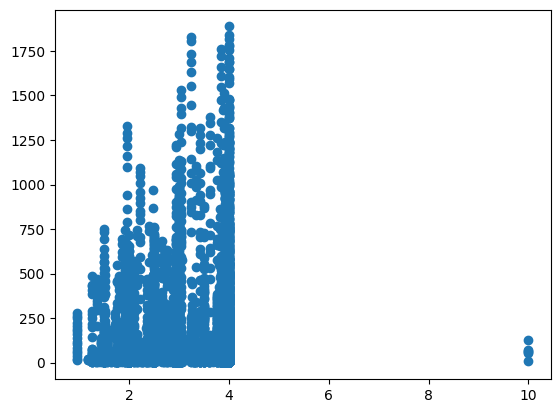

In [25]:
plt.scatter(df_merged_1k['kwp'], y=df_merged_1k['generation_w'],)

# 07 Building Neural Network Sequential Model 🧠


In [18]:
# drop duplicates
df_merged_1k.duplicated().sum()

0

In [17]:
X = df_merged_1k.drop(columns=['generation_w']).select_dtypes(include='number')
y = df_merged_1k['generation_w']
X

,ss_id,latitude_rounded,longitude_rounded,orientation,tilt,kwp
0,3952,51.39,1.41,180.0,33.0,3.99
1,6125,51.34,1.31,110.0,32.0,3.92
2,6867,51.16,1.29,225.0,35.0,2.88
3,3513,50.78,0.13,135.0,47.0,3.24
4,5660,51.22,1.37,180.0,35.0,3.99
...,...,...,...,...,...,...
9995,11886,55.63,-4.49,230.0,5.0,2.00
9996,12368,51.72,-2.52,171.0,43.0,3.00
9997,12398,55.92,-4.66,185.0,30.0,3.00
9998,12646,53.73,-2.28,180.0,30.0,2.00


In [19]:
# preprocess data
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
# compile model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=X.shape[1]))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='linear'))  # Linear activation for regression
model.summary()

model.compile(
    optimizer='adam',
    loss='mean_squared_error',  # Regression loss function
    metrics=['mean_absolute_error']  # Optional metric for evaluation
)

model.fit(X_train, y_train, batch_size=16, epochs=20,verbose=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - loss: 67620.6328 - mean_absolute_error: 130.9012
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 49214.5352 - mean_absolute_error: 113.5212
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 41942.8516 - mean_absolute_error: 122.0400
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 44277.8047 - mean_absolute_error: 125.0713
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 43910.4883 - mean_absolute_error: 125.3196
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 44390.0820 - mean_absolute_error: 127.3374
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 48812.4727 - mean_absolute_error: 129.4403
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 44420.7422 - mean_absolute_error: 125.2240
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 43715.3125 - mean_absolute_error: 126.5209
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step 

In [21]:
# Evaluate performance
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 44449.0625 - mean_absolute_error: 125.0390


[43750.57421875, 124.65425109863281]

In [23]:
# Check Predictions
# Predicted probabilities
y_pred = model.predict(scaler.transform(X_test))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step
